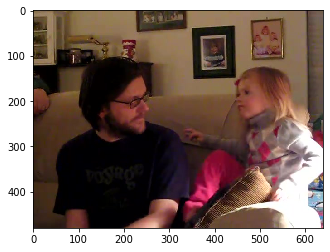

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
img_path = 'frames/1008/4219909195/4219909195_000600.jpg'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

In [7]:
import os, json
val_traj_path = 'vidvrd-mff/data/vidor/vidor_val_object_trajectories.json'
with open(val_traj_path, 'rb') as f:
    val_traj = json.load(f)
print(len(val_traj['results']))

835


In [62]:
video_id = '1008/4219909195'
video_traj_result = val_traj['results'][video_id]
idx = 5

print('nb of trajectories:', len(video_traj_result)) # a list

print('keys of a trajectory:', video_traj_result[idx].keys())
print('category:', video_traj_result[idx]['category'])
print('score:', video_traj_result[idx]['score'])
print('start_fid:', video_traj_result[idx]['start_fid'])
print('end_fid:', video_traj_result[idx]['end_fid'])
print('org_start_fid:', video_traj_result[idx]['org_start_fid'])
print('org_end_fid:', video_traj_result[idx]['org_end_fid'])
print('length of trajectory:', len(video_traj_result[idx]['trajectory']))

for frame_id in sorted(video_traj_result[idx]['trajectory'].keys()):
    print(frame_id, video_traj_result[idx]['trajectory'][frame_id])

nb of trajectories: 16
keys of a trajectory: dict_keys(['category', 'start_fid', 'org_end_fid', 'trajectory', 'end_fid', 'height', 'width', 'score', 'org_start_fid'])
category: screen/monitor
score: 0.48090000000000005
start_fid: 482
end_fid: 811
org_start_fid: 522
org_end_fid: 551
length of trajectory: 330
000482 [245, 78, 326, 170]
000483 [246, 78, 327, 170]
000484 [247, 78, 328, 170]
000485 [252, 78, 333, 170]
000486 [255, 78, 336, 170]
000487 [260, 78, 341, 170]
000488 [265, 80, 346, 172]
000489 [268, 84, 349, 176]
000490 [271, 88, 352, 180]
000491 [274, 94, 355, 186]
000492 [275, 98, 356, 190]
000493 [278, 100, 359, 192]
000494 [279, 102, 360, 194]
000495 [282, 102, 363, 194]
000496 [283, 104, 364, 196]
000497 [284, 104, 365, 196]
000498 [285, 106, 366, 198]
000499 [286, 106, 367, 198]
000500 [285, 106, 366, 198]
000501 [286, 106, 367, 198]
000502 [283, 106, 364, 198]
000503 [282, 106, 363, 198]
000504 [281, 106, 362, 198]
000505 [280, 106, 361, 198]
000506 [279, 106, 360, 198]
00

In [40]:
import numpy as np

with open('vidvrd-mff/data/vidor/object_labels.txt') as f:
    vidor_classes = f.readlines()

vidor_classes = [cls.strip() for cls in vidor_classes]
print(vidor_classes)

cls_to_idx = {cls:i for i, cls in enumerate(vidor_classes)}
print(cls_to_idx)

# vidor_classes = np.asarray(['__background__',
#                             'bread', 'cake', 'dish', 'fruits', 'vegetables', 'backpack', 'camera',
#                             'cellphone', 'handbag', 'laptop', 'suitcase', 'ball/sports_ball',
#                             'bat', 'frisbee', 'racket', 'skateboard', 'ski', 'snowboard', 'surfboard', 'toy',
#                             'baby_seat', 'bottle', 'chair', 'cup', 'electric_fan', 'faucet', 'microwave', 'oven',
#                             'refrigerator', 'screen/monitor',
#                             'sink', 'sofa', 'stool', 'table', 'toilet', 'guitar', 'piano', 'baby_walker', 'bench',
#                             'stop_sign', 'traffic_light', 'aircraft', 'bicycle', 'bus/truck',
#                             'car', 'motorcycle', 'scooter', 'train', 'watercraft', 'crab', 'bird', 'chicken',
#                             'duck', 'penguin', 'fish', 'stingray', 'crocodile', 'snake', 'turtle', 'antelope',
#                             'bear', 'camel', 'cat', 'cattle/cow',
#                             'dog', 'elephant', 'hamster/rat',
#                             'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'pig', 'rabbit', 'sheep/goat',
#                             'squirrel', 'tiger', 'adult', 'baby', 'child'
#                             ])

['bread', 'cake', 'dish', 'fruits', 'vegetables', 'backpack', 'camera', 'cellphone', 'handbag', 'laptop', 'suitcase', 'ball/sports_ball', 'bat', 'frisbee', 'racket', 'skateboard', 'ski', 'snowboard', 'surfboard', 'toy', 'baby_seat', 'bottle', 'chair', 'cup', 'electric_fan', 'faucet', 'microwave', 'oven', 'refrigerator', 'screen/monitor', 'sink', 'sofa', 'stool', 'table', 'toilet', 'guitar', 'piano', 'baby_walker', 'bench', 'stop_sign', 'traffic_light', 'aircraft', 'bicycle', 'bus/truck', 'car', 'motorcycle', 'scooter', 'train', 'watercraft', 'crab', 'bird', 'chicken', 'duck', 'penguin', 'fish', 'stingray', 'crocodile', 'snake', 'turtle', 'antelope', 'bear', 'camel', 'cat', 'cattle/cow', 'dog', 'elephant', 'hamster/rat', 'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'pig', 'rabbit', 'sheep/goat', 'squirrel', 'tiger', 'adult', 'baby', 'child']
{'bread': 0, 'cake': 1, 'dish': 2, 'fruits': 3, 'vegetables': 4, 'backpack': 5, 'camera': 6, 'cellphone': 7, 'handbag': 8, 'laptop': 9, 'suitca

In [43]:
def vis_detections(im, class_name, dets, thresh=0.8):
    """Visual debugging of detections."""
    for i in range(np.minimum(10, dets.shape[0])):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        score = dets[i, -1]
        if score > thresh:
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
            cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=1)
    return im

def vis_detections_allclss(im, dets, vidor_clss, thresh=0.8):
    """Visual debugging of detections."""
    for i in range(dets.shape[0]):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        score = dets[i, 4]
        class_name = vidor_clss[int(dets[i, 5])]
        if score > thresh:
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
            cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=2)
    return im

[[2.910e+02 1.100e+02 6.150e+02 4.650e+02 6.041e-01 7.900e+01]]


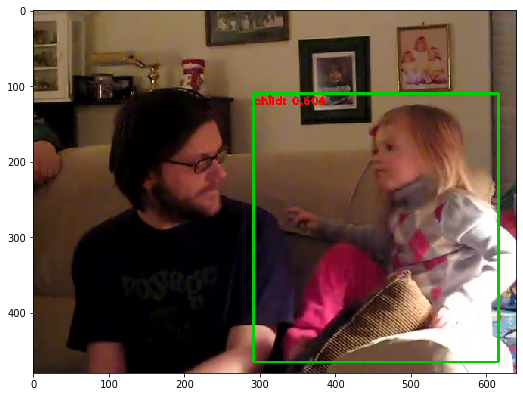

In [60]:
# from utils.vis import vis_detections, vis_detections_allclss
import cv2
import matplotlib

# img_vis = vis_detections(cv2.imread(img_path), vidor_classes[-1], bboxes['4219909195_000002.jpg'], 0.05)
img = cv2.imread(img_path)
# img_vis = vis_detections_allclss(img, bboxes['4219909195_000600.jpg'], vidor_classes, 0.2)

idx = 3
bbox = video_traj_result[idx]['trajectory']['000600']
score = video_traj_result[idx]['score']
cls = cls_to_idx[video_traj_result[idx]['category']]
bbox_result = np.array([bbox + [score, cls]])
print(bbox_result)

img_vis = vis_detections_allclss(img, bbox_result, vidor_classes, 0.2)
# result_path = os.path.join('data/vis/vidor_val',vid+'-'+str(j)+'-'+fid)
# cv2.imwrite(result_path, im2show)
# plt.figure(figsize=(img.shape[0],img.shape[1]))
# plt.figure(figsize=(640, 480))

height, width, depth = img_vis.shape
dpi = matplotlib.rcParams['figure.dpi']

figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)

plt.imshow(cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB))
plt.show()